In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
import pytz
from pytz import timezone
from pandas.io import sql
import pymysql.cursors

import numpy
from numpy import mean

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

###### Please find below questions related to "demographics" part of the study

- Users characteristics ?
- What does a typical user look like ?
- What goals do they have ?
- How do these goals vary by demographics or need ? 

In [2]:
#Importing all datasets (all of operations are detailled in notebooks from directory called "exploring")

#users with complete timezone
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users_timezone.csv',error_bad_lines=False)

#food
food_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/food.csv',error_bad_lines=False)

#exercise
ex_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/exercise.csv',error_bad_lines=False)

#weight
weight_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/weight.csv',error_bad_lines=False)

In [3]:
users_df.head()

,Unnamed: 0,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,0,24822001,2017-09-14,NaN,18,BR,pt,f,2017-09-14 00:00:00 FNT-0200,178.7
1,1,23529201,2017-07-12,50.0,23,NL,nl,m,2017-07-12 00:00:00 CEST+0200,50.0
2,2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2
3,3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1
4,4,24776001,2017-09-12,52.0,23,CA,en,f,2017-09-12 00:00:00 EDT-0400,70.0


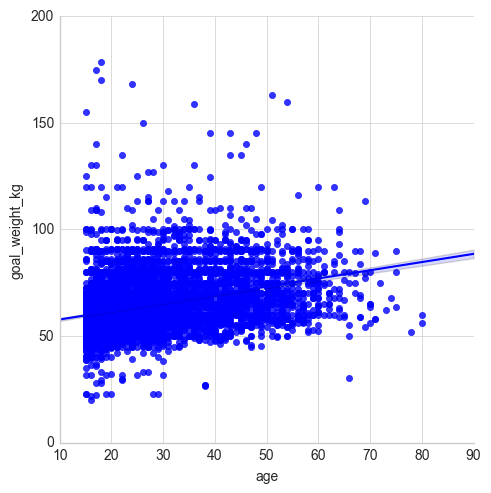

In [31]:
# Using seabron to create a linear fit
sns.lmplot('age','goal_weight_kg',data = users_df)

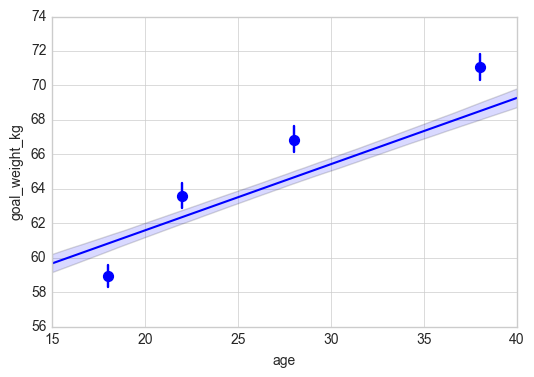

In [39]:
# Same display as above, goal_weight per age
sns.regplot(x="age", y="goal_weight_kg", data=users_df, x_bins=4)

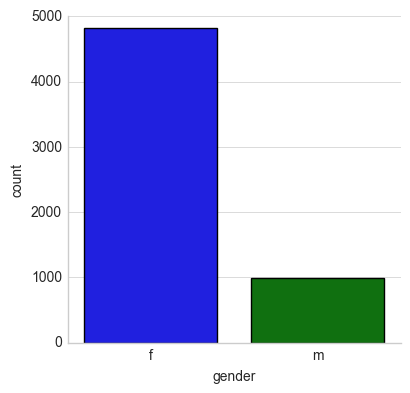

In [4]:
#Searching of users characteristics
sns.factorplot('gender', kind="count", data=users_df)

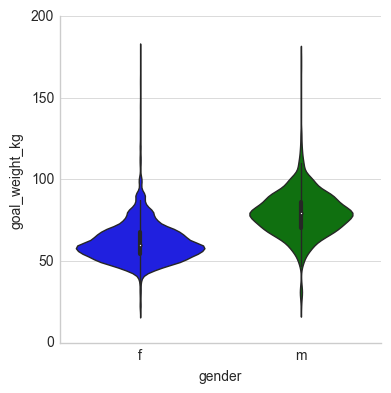

In [5]:
# Factorplot the affiliation by Population
sns.factorplot(x="gender", y="goal_weight_kg", kind="violin", data=users_df)

In [18]:
#General age characteristics
age_mean = mean(users_df['age'])
age_min = min(users_df['age'])
age_max = max(users_df['age'])

print ('The mean age is {} years old'.format(age_mean))
print ('The max age is {} years old'.format(age_max))
print ('The min age is {} years old'.format(age_min))

The mean age is 28.2382099828 years old
The max age is 80 years old
The min age is 15 years old


In [31]:
#Age characteristics by gender

m_df = users_df.copy()
f_df = users_df.copy()

male_df = m_df.loc[(m_df['gender'] == 'm')]
female_df = f_df.loc[(f_df['gender'] == 'f')]

#Male age characteristics
m_age_mean = mean(male_df['age'])
m_age_min = min(male_df['age'])
m_age_max = max(male_df['age'])
                         
#Male age characteristics
f_age_mean = mean(female_df['age'])
f_age_min = min(female_df['age'])
f_age_max = max(female_df['age'])

print ('The female mean age is {} years old'.format(f_age_mean))
print ('The female max age is {} years old'.format(f_age_min))
print ('The female min age is {} years old'.format(f_age_max))
print("")
print ('The male mean age is {} years old'.format(m_age_mean))
print ('The male max age is {} years old'.format(m_age_min))
print ('The male min age is {} years old'.format(m_age_max))

The female mean age is 27.6825166113 years old
The female max age is 15 years old
The female min age is 80 years old

The male mean age is 30.930583501 years old
The male max age is 15 years old
The male min age is 75 years old


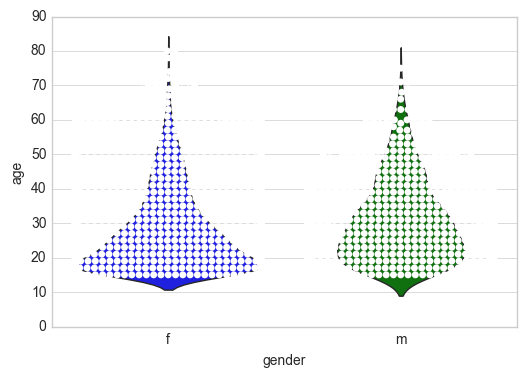

In [33]:
# Swarn into violin plot
ax = sns.violinplot(x="gender", y="age", data=users_df, inner=None)
ax = sns.swarmplot(x="gender", y="age", data=users_df, color="white", edgecolor="gray")
ax

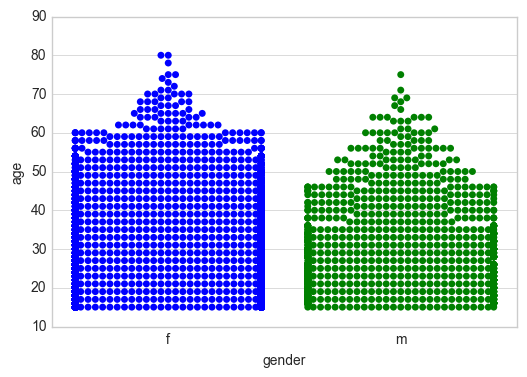

In [23]:
# Only swarn plot age by gender
sns.swarmplot(x="gender", y="age", data=users_df)

In [17]:
#Define a BIM referential (from https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi-m.htm)

#Two lists to implement my referential
categories = ['underweight','normal_weight', 'overweight','obesity']
bim_range = ['<18.5', '[18.5;25[', '[25–30]', '>30']

#Dataframe creation
d = {'categories':categories,'bim_range':bim_range}
bim_df = pd.DataFrame(d)

bim_df.head()

,bim_range,categories
0,<18.5,underweight
1,[18.5;25[,normal_weight
2,[25–30],overweight
3,>30,obesity


In [4]:
#Categorize users target bim (step 1)

#Calculate the numeric value
bim_num = []

for i in range (len(users_df['user_id'])):
    bim_num.append(users_df['goal_weight_kg'][i]/((users_df['height_cm'][i]*0.01)**2))
    

In [5]:
#Categorize users target bim (step 2)

#Identify the label
bim_cat = []

for i in range (len(bim_num)):
    
    if bim_num[i] < 18.5:
        bim_cat.append(bim_df['categories'][0])
        
    elif 18.5 <= bim_num[i] < 25:
        bim_cat.append(bim_df['categories'][1])
    
    elif 25 <= bim_num[i] <= 30:
        bim_cat.append(bim_df['categories'][2])
        
    elif bim_num[i] > 30:
        bim_cat.append(bim_df['categories'][3])
    
    else:
        bim_cat.append(np.nan)

In [6]:
#Enrich the dataframe
users_df['bim_num'] = bim_num
users_df['bim_cat'] = bim_cat

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 12 columns):
Unnamed: 0        5810 non-null int64
user_id           5810 non-null int64
start_date        5810 non-null object
height_cm         5809 non-null float64
age               5810 non-null int64
country           5808 non-null object
language          5810 non-null object
gender            5810 non-null object
timezone          5809 non-null object
goal_weight_kg    5810 non-null float64
bim_num           5809 non-null float64
bim_cat           5809 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 544.8+ KB


In [45]:
users_df.head()

,Unnamed: 0,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg,bim_num,bim_cat
0,0,24822001,2017-09-14,NaN,18,BR,pt,f,2017-09-14 00:00:00 FNT-0200,178.7,NaN,NaN
1,1,23529201,2017-07-12,50.0,23,NL,nl,m,2017-07-12 00:00:00 CEST+0200,50.0,200.000000,obesity
2,2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2,228.800000,obesity
3,3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1,122.411243,obesity
4,4,24776001,2017-09-12,52.0,23,CA,en,f,2017-09-12 00:00:00 EDT-0400,70.0,258.875740,obesity


In [8]:
# Which country are the most represented ? 
count_df = users_df['country'].groupby(users_df['country']).value_counts().nlargest(5)
count_df

country  country
US       US         1677
DE       DE          811
RU       RU          687
GB       GB          285
SE       SE          271
Name: country, dtype: int64

In [9]:
# Get most represented countries
country_df = users_df.loc[(users_df['country'] == 'US') | (users_df['country'] == 'DE') | (users_df['country'] == 'RU') | (users_df['country'] == 'GB') | (users_df['country'] == 'SE')]
country_df.head()

,Unnamed: 0,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg,bim_num,bim_cat
2,2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2,228.800000,obesity
3,3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1,122.411243,obesity
9,9,24695601,2017-09-07,54.0,18,GB,en,f,2017-09-07 00:00:00 BST+0100,54.0,185.185185,obesity
13,13,23585801,2017-07-15,56.0,18,GB,en,f,2017-07-15 00:00:00 BST+0100,45.4,144.770408,obesity
19,19,24094001,2017-08-07,72.0,18,GB,en,f,2017-08-07 00:00:00 BST+0100,45.4,87.577160,obesity


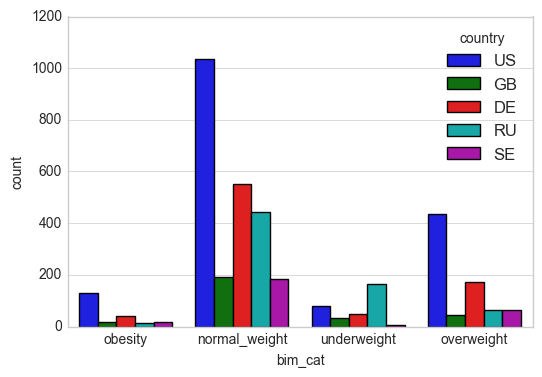

In [11]:
# Users goal's weight per country
sns.countplot(x="bim_cat", hue="country", data=country_df)

##### Comment:
It's important to notice this graph shows goal_weight_kg 

We will see below the same representation with first users' weight registered in the app

In [26]:
#Getting the first weight record
first_weight_record_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/from_DB/_view_first_weight_tracking_per_user.csv',error_bad_lines=False)
first_weight_record_df = first_weight_record_df.drop('index',axis=1)
first_weight_record_df.head()

,user_id,date,weight_kg,height_cm,goal_weight_kg,country
0,24822001,2017-09-14,197.8,NaN,178.7,BR
1,23529201,2017-07-12,60.0,50.0,50.0,NL
2,23379001,2017-07-05,39.5,52.0,33.1,GB
3,24776001,2017-09-12,100.0,52.0,70.0,CA
4,23300201,2017-07-01,71.0,52.0,58.0,AU


In [27]:
# In order to compare, we filter the dataframe with same countries
country2_df = first_weight_record_df.loc[(first_weight_record_df['country'] == 'US') | (first_weight_record_df['country'] == 'DE') | (first_weight_record_df['country'] == 'RU') | (first_weight_record_df['country'] == 'GB') | (first_weight_record_df['country'] == 'SE')]
country2_df = country2_df.reset_index(drop=True)
country2_df.head()

,user_id,date,weight_kg,height_cm,goal_weight_kg,country
0,23379001,2017-07-05,39.5,52.0,33.1,GB
1,24695601,2017-09-07,82.1,54.0,54.0,GB
2,23585801,2017-07-15,63.5,56.0,45.4,GB
3,24094001,2017-08-07,55.3,72.0,45.4,GB
4,24532001,2017-08-29,52.6,100.0,46.7,GB


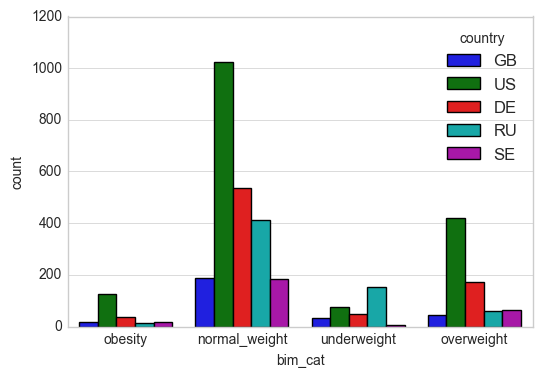

In [28]:
# Users weight per country at registration

#Like we previously did, we calculate the users' BIM category at registration
bim_num = []

for i in range (len(country2_df['user_id'])):
    bim_num.append(country2_df['goal_weight_kg'][i]/((country2_df['height_cm'][i]*0.01)**2))
    
#Label identification
bim_cat = []
for i in range (len(bim_num)):
    if bim_num[i] < 18.5:
        bim_cat.append(bim_df['categories'][0])
    elif 18.5 <= bim_num[i] < 25:
        bim_cat.append(bim_df['categories'][1])
    elif 25 <= bim_num[i] <= 30:
        bim_cat.append(bim_df['categories'][2])
    elif bim_num[i] > 30:
        bim_cat.append(bim_df['categories'][3])
    else:
        bim_cat.append(np.nan)
        
#Enrich the dataframe
country2_df['bim_num'] = bim_num
country2_df['bim_cat'] = bim_cat


sns.countplot(x="bim_cat", hue="country", data=country2_df)